# TP Python 2 - Chaine de Markov

Import :

In [227]:
import numpy as np
import random
import matplotlib.pyplot as plt

### Exercice 1 :

Ecrire une fonction matrice_stochastique qui prend une matrice en argu-
ment, vérifie qu’elle est stochastique et retourne True ou False selon qu’elle est ou non
stochastique.

In [114]:
def matrice_stochastique(mat):
    for i in range (len(mat)):
        sommeCol = 0;
        for j in range (len(mat[i])):
            if (mat[j][i]>=0):
                sommeCol += mat[j][i]
            else :
                return False
        if (sommeCol != 1):
            return False
    return True

P1 = np.array([[0.5, 0.5],
               [0.5, 0.5]])
P2 = np.array([[1, 0],
               [0, 1]])
P3 = np.array([[0.8, 0.2],
               [0.4, 0.6]])
print (matrice_stochastique(P1), matrice_stochastique(P2), matrice_stochastique(P3))

True True False


### Exercice 2 :

Écrire une fonction chaine_irreductible qui prend une matrice stochas-
tique P en argument et retourne True ou False selon que la chaine de Markov associée
est ou non irréductible. On ajoutera une alerte si la matrice donnée n’est pas stochastique.

Pour cela, on calculera P, P2, . . . , Pn où n est le nombre d’états puis on calculera S =
P + P2 + · · · + Pn. Si tous les coefficients de S sont strictement positifs alors la chaîne est
irréductible. On pourra justifier ce fait.

In [119]:
def chaine_irreductible(P):
    if (not matrice_stochastique(P)):
        raise Exception("Pas Stochastique")
    res =np.copy(P)
    puissanceAct = np.copy(P)
    for i in range (len(P)-1):
        puissanceAct = np.matmul(puissanceAct,P)
        res = np.add(res, puissanceAct)
    for i in range (len(res)):
        for j in range (len(res[i])):
           if (res[i][j]<=0):
               return False
    return True
    
P4 = np.array([[0.5, 0.5],
               [0.5, 0.5]])
P5 = np.array([[0, 1],
               [1, 0]])
P6 = np.array([
    [0.7, 0.0, 0.0],
    [0.3, 0.5, 0.0],
    [0.0, 0.5, 1.0]
])

print (chaine_irreductible(P4),chaine_irreductible(P5),chaine_irreductible(P6))

True True False


### Exercice 3 :

Ecrire une fonction Markov(P,i,n) qui simule (Xn) en partant de l’état i
pour une matrice de transition P. Faire un test pour des matrices P vues en cours.

In [223]:
def Markov(P,i,n):
    for x in range(n):
        r = random.random()
        val =  0
        for j in range(len(P[i])):
            val += P[j][i]
            if (val>=r):
                i=j
                break
    return i

print (Markov(P4,1,4),Markov(P5,0,3),Markov(P6,2,4))

1 1 2


### Exercice 4: 

Écrire une fonction marche_aleatoire(i,n) qui affiche avec la commande
plot de matplotlib.pyplot une trajectoire aléatoire de longueur n en partant de i ∈ Z

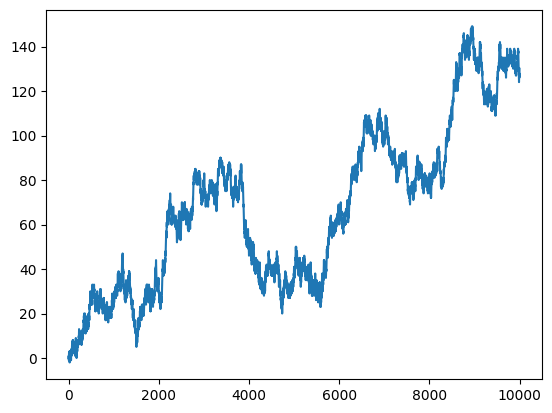

In [234]:
def marche_aleatoire(i,n):
    list= [i]
    for j in range(n):
        r = random.random()
        if (r<=0.5):
            i += 1
        else:
            i -= 1
        list.append(i)
    plt.plot(range(n+1),list)
    plt.show

marche_aleatoire(0,10000)